### Clean Neural Network Implementation

In [13]:
import numpy as np

np.random.seed(0)

# Generate data
X = np.random.randn(100, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(y_true, y_pred):
    eps = 1e-8
    log_preds = np.log(y_pred + eps)
    log_minus_preds = np.log(1 - y_pred + eps)
    loss = -np.mean(y_true * log_preds + (1 - y_true) * log_minus_preds)
    return loss

# Initialize parameters
W1 = np.random.randn(2, 4)
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))

# Training loop
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
    loss = compute_loss(y, A2)

    dZ2 = A2 - y
    dW2 = A1.T @ dZ2 / len(X)
    db2 = np.mean(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * (Z1 > 0)
    dW1 = X.T @ dZ1 / len(X)
    db1 = np.mean(dZ1, axis=0, keepdims=True)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.8111
Epoch 100: Loss = 0.4990
Epoch 200: Loss = 0.3206
Epoch 300: Loss = 0.2283
Epoch 400: Loss = 0.1792
Epoch 500: Loss = 0.1490
Epoch 600: Loss = 0.1282
Epoch 700: Loss = 0.1126
Epoch 800: Loss = 0.1006
Epoch 900: Loss = 0.0909


## Model Evaluation
- Check how accurately it predicts the labels
- Visualize the decision boundary that separates the two classes.


In [14]:
# Final forward pass
Z1 = X @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
A2 = sigmoid(Z2)

# Predictions
y_pred = (A2 > 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(y_pred == y)

# Display results for first 10 samples
print("Sample | True Label | Predicted Label | Probability")
print("-------|------------|-----------------|------------")
for i in range(10):
    print(f"{i:6d} | {y[i, 0]:11d} | {y_pred[i, 0]:15d} | {A2[i, 0]:.4f}")

# Final accuracy
print("\nFinal accuracy: {:.2f}%".format(accuracy * 100))


Sample | True Label | Predicted Label | Probability
-------|------------|-----------------|------------
     0 |           1 |               1 | 0.9824
     1 |           1 |               1 | 1.0000
     2 |           0 |               0 | 0.0001
     3 |           0 |               0 | 0.1848
     4 |           0 |               0 | 0.3044
     5 |           1 |               1 | 0.8645
     6 |           1 |               1 | 0.7668
     7 |           1 |               1 | 0.9627
     8 |           0 |               0 | 0.1228
     9 |           0 |               0 | 0.0589

Final accuracy: 100.00%


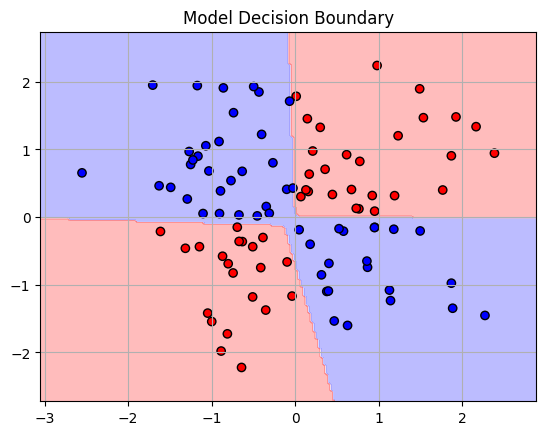

In [15]:
import matplotlib.pyplot as plt

# Create a grid of points to predict on
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
Z1_grid = grid @ W1 + b1
A1_grid = relu(Z1_grid)
Z2_grid = A1_grid @ W2 + b2
A2_grid = sigmoid(Z2_grid)
pred_grid = (A2_grid > 0.5).astype(int).reshape(xx.shape)

# Plot decision boundary and original points
plt.contourf(xx, yy, pred_grid, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k')
plt.title("Model Decision Boundary")
plt.grid(True)
plt.show()